In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Switch to branch `workstation`

In [43]:
from l5pc.utils.simulation_utils import (
    assemble_prior,
    assemble_simulator,
    assemble_db,
    write_to_dj,
)
import dill
import pickle
import torch
from l5pc.model import (
    Priorl5pc,
    simulate_l5pc,
    setup_l5pc,
    summstats_l5pc,
    setup_l5pc,
)
from os.path import join
from sbi.analysis import pairplot
from l5pc.model.utils import return_gt, return_x_names, return_names
import numpy as np
from torch import as_tensor, ones, zeros, eye, float32
from l5pc.utils.common_utils import load_posterior
from l5pc.model.utils import return_gt, return_names, return_xo
from sbi.utils import BoxUniform
from sbi.utils.support_posterior import PosteriorSupport
from omegaconf import DictConfig
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from l5pc.utils.model_utils import (
    replace_nan,
    add_observation_noise,
)
from l5pc.utils.common_utils import (
    load_prior,
    extract_bounds,
    load_posterior,
)
from l5pc.utils.evaluation_utils import (
    predictive_traces,
    plot_traces,
    plot_summstats,
    compare_gt_log_probs,
    gt_log_prob,
    coverage,
    plot_coverage,
)
from l5pc.model import L5PC_20D_theta, L5PC_20D_x

In [44]:
setup_l5pc()

Loading neuron libraries
Successfully loaded libraries!


## Panel A

## Panel B

In [45]:
prior = assemble_prior(DictConfig({"model": {"name": "l5pc", "num_params": 20, "prior": [[]]}}))

In [46]:
theta = return_gt()

In [47]:
trace = simulate_l5pc(theta)

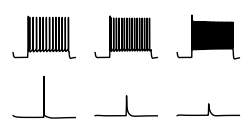

In [89]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(2, 3, figsize=(3, 1.5))
    ax[1, 0].plot(trace[0]['bAP.soma.v']["time"], trace[0]['bAP.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[1, 1].plot(trace[0]['bAP.dend1.v']["time"], trace[0]['bAP.dend1.v']["voltage"], c="k", linewidth=1.0)
    ax[1, 2].plot(trace[0]['bAP.dend2.v']["time"], trace[0]['bAP.dend2.v']["voltage"], c="k", linewidth=1.0)
    ax[0, 0].plot(trace[0]['Step1.soma.v']["time"], trace[0]['Step1.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[0, 1].plot(trace[0]['Step2.soma.v']["time"], trace[0]['Step2.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[0, 2].plot(trace[0]['Step3.soma.v']["time"], trace[0]['Step3.soma.v']["voltage"], c="k", linewidth=1.0)
    
    for i in range(2):
        for j in range(3):
            ax[i, j].set_xticks([])
            ax[i, j].set_ylim([-90, 50])
            ax[i, j].set_yticks([])
            ax[i, j].set_yticklabels([])
            ax[i, j].spines["left"].set_visible(False)
            ax[i, j].spines["bottom"].set_visible(False)
    plt.savefig("../svg/panel_b.svg")

## Panel C

In [92]:
_ = torch.manual_seed(0)
theta = prior.sample((4,))
trace = simulate_l5pc(theta, protocol_subset=["Step1"])

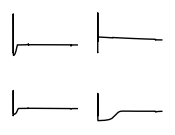

In [93]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(2, 2, figsize=(2.0, 1.5))
    ax[0, 0].plot(trace[0]['Step1.soma.v']["time"], trace[0]['Step1.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[0, 1].plot(trace[1]['Step1.soma.v']["time"], trace[1]['Step1.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[1, 0].plot(trace[2]['Step1.soma.v']["time"], trace[2]['Step1.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[1, 1].plot(trace[3]['Step1.soma.v']["time"], trace[3]['Step1.soma.v']["voltage"], c="k", linewidth=1.0)
    
    for i in range(2):
        for j in range(2):
            ax[i, j].set_xticks([])
            ax[i, j].set_ylim([-90, 50])
            ax[i, j].set_yticks([])
            ax[i, j].set_yticklabels([])
            ax[i, j].spines["left"].set_visible(False)
            ax[i, j].spines["bottom"].set_visible(False)
    plt.savefig("../svg/panel_c.svg")

## Panel D

In [96]:
x_db = L5PC_20D_x()
theta_db = L5PC_20D_theta()
data_id = "l20_0"

In [19]:
data_id = "l20_0"
round_ = 1
theta = as_tensor(
    np.asarray(
        (theta_db & {"round": round_} & {"id": data_id}).fetch(*return_names())
    ),
    dtype=float32,
).T
x = as_tensor(
    np.asarray(
        (x_db & {"round": round_} & {"id": data_id}).fetch(*return_x_names())
    ),
    dtype=float32,
).T

x_pd = pd.DataFrame(x[-10000:].numpy(), columns=return_x_names())

x = x[-1000:]
theta = theta[-1000:]
x, _ = replace_nan(x)
x = add_observation_noise(
    x=x,
    id_=data_id,
    noise_multiplier=0.0,
    std_type="data",
    subset=None,
)

Number of nan vals [17 17 26 34 15 17 17 34 17 15 17 17 17 17 15 17 15 19 32 17 17 15 15 17
 17 17 17 17 16 17 17 34 17 17 17 17 17 15 17 17 15 15 17 17 17 17 33 15
 17 17 15 17 34 17 15 17 17 16 15 15 17 17 17 17 17 17 17 17 17 15 17 17
 17 17 17 16 15 15 34 16 17 15 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 15 15 13 17 17 16 17 17 17 17 15 15 17 15 17 17 17 15 17 17 15 16
 17 17 15 17 15 17 17 15 15 33 17 15 15 16 17 15 15 17 15 17 17 17 17 15
 17 17 17 15 17 17 17 17 15 15 17 15 17 32 15 17 17 16 15 15 16 15 17 17
 17 15 17 17 15 17 17 17 17 15 15 17 17 17 17 17 17 15 15 15 15 17 34 15
 17 15 16 15 17 17 16 15 12 16 17 17 17 17 17 15 15 16 15 15 17 17 17 17
 12 17 14 34 17 15 17 15 34 17 15 17 17 15 17 15 15 17 16 17 17 17 17 17
 32 34 34 17 17 12 17 17 17 17 17 32 17 32 15 17 15 14 34 17 16 17 15 17
 17 12 15 15 15 17 17 15 15 17 15 16 17 17 15 17 34 16 17 12 17 15 17 17
 17 17 15 17 15 15 15 17 34 34 17 14 17 17 17 17 15 17 17 16 17 15 15  6
 17 17 17 15 17 17 34 17 17 16 1

In [48]:
base_path = "/home/michael/Documents/tsnpe_collection/l5pc/"
path = "2022_04_13__19_32_02_snpe_m/1"
inference_path = join(base_path, f"results/l20_0/inference/{path}")
with open(join(inference_path, "inference.pkl"), "rb") as handle:
    inferences = dill.load(handle)
with open(join(inference_path, "xo.pkl"), "rb") as handle:
    xo = pickle.load(handle)
xo = as_tensor(xo, dtype=float32)
posteriors = [infer.build_posterior().set_default_x(xo) for infer in inferences]

In [49]:
# _ = torch.manual_seed(0)
# alphas = []
# covs = []
# for i in range(10):
#     alpha, cov = coverage(posteriors[i], theta, x, np.arange(35))
#     alphas.append(alpha)
#     covs.append(cov)

# np.savez("../../results/alphas_covs_separate_nets.npz", alphas=alphas, covs=covs)

In [22]:
data = np.load("../../results/alphas_covs_separate_nets.npz", allow_pickle=True)
alphas = data["alphas"]
covs = data["covs"]

In [23]:
print(mpl.get_cachedir())

/home/michael/.cache/matplotlib


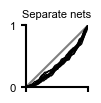

In [24]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.8, 0.8))
    ax.plot([0, 1.0], [0, 1.0], c="grey")
    for i in range(10):
        ax.plot(alphas[i], covs[i], c="k", linewidth=1.0)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xticklabels([])
    ax.set_title("Separate nets")
    plt.savefig("../svg/panel_c1.svg")

In [25]:
inference, posterior, used_features, round_ = load_posterior(data_id, "2022_04_13__19_32_02_snpe_m/1")

In [27]:
# _ = torch.manual_seed(1)
# alpha_ens, cov_ens = coverage(posterior, theta, x, used_features)
# np.savez("../../results/alphas_covs_ensemble_net.npz", alpha=alpha_ens, cov=cov_ens)

In [28]:
data = np.load("../../results/alphas_covs_ensemble_net.npz", allow_pickle=True)
alpha_ens = data["alpha"]
cov_ens = data["cov"]

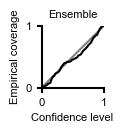

In [29]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.8, 0.8))
    ax.plot([0, 1.0], [0, 1.0], c="grey")
    ax.plot(alpha_ens, cov_ens, c="k")
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_xlabel("Confidence level")
    ax.set_ylabel("Empirical coverage")
    ax.set_title("Ensemble")
    plt.savefig("../svg/panel_c2.svg", transparent=True)

## Panel D

In [50]:
inference, posterior, used_features, round_ = load_posterior(data_id, "2022_04_19__20_55_09_snpe_m/0")

In [51]:
prior_bounds = extract_bounds(prior).T.numpy()

In [52]:
all_labels = []
for dim_i in range(4):
    labels = [prior_bounds[dim_i, num_tmp] for num_tmp in range(2)]
    new_labels = []
    counter = 0
    for l in labels:
        if counter == 0:
            new_labels.append(r'$\mathdefault{'+str(l)+'}\;\;\;$  ')
        else:
            new_labels.append(r'$\mathdefault{'+str(l)+'}\;\;\;$   ')
        counter+=1
    all_labels.append(new_labels)

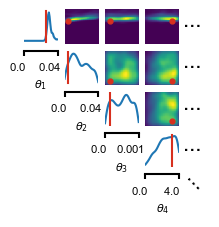

In [54]:
posterior_samples = posterior.sample((1000,), show_progress_bars=False)
with mpl.rc_context(fname="../../.matplotlibrc"):
    _ = pairplot(
        posterior_samples,
        limits=prior_bounds,
        subset=[0, 1, 2, 3],
        upper=["kde"],
        diag=["kde"],
        ticks=prior_bounds,
        figsize=(2,2),
        labels=[r"$\theta_1$", r"$\theta_2$", r"$\theta_3$", r"$\theta_4$"],
        tick_labels=all_labels,
        points=return_gt(as_pd=False),
        points_colors=["#d7301f"],
        points_offdiag={"markersize": 7}
    )
    plt.savefig("../svg/panel_d.svg")

## Panel E

In [99]:
_ = torch.manual_seed(0)
theta = posterior.sample((3,))
theta = pd.DataFrame(theta.numpy(), columns=return_names())
trace = simulate_l5pc(theta, protocol_subset=["Step1"])

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

/home/michael/anaconda3/envs/tsnpe/lib/python3.8/site-packages/nflows/transforms/lu.py:80: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  outputs, _ = torch.triangular_solve(


Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

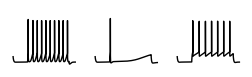

In [100]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 3, figsize=(3, 0.75))
    ax[0].plot(trace[0]['Step1.soma.v']["time"], trace[0]['Step1.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[1].plot(trace[1]['Step1.soma.v']["time"], trace[1]['Step1.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[2].plot(trace[2]['Step1.soma.v']["time"], trace[2]['Step1.soma.v']["voltage"], c="k", linewidth=1.0)
    
    for j in range(3):
        ax[j].set_xticks([])
        ax[j].set_ylim([-90, 50])
        ax[j].set_yticks([])
        ax[j].set_yticklabels([])
        ax[j].spines["left"].set_visible(False)
        ax[j].spines["bottom"].set_visible(False)
    plt.savefig("../svg/panel_e.svg")

## Panel F

In [101]:
_ = torch.manual_seed(0)
theta = posterior.sample((1,))
theta = pd.DataFrame(theta.numpy(), columns=return_names())
trace = simulate_l5pc(theta)

Drawing 1 posterior samples:   0%|          | 0/1 [00:00<?, ?it/s]

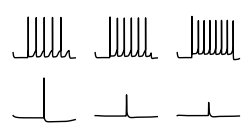

In [102]:
with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(2, 3, figsize=(3, 1.5))
    ax[1, 0].plot(trace[0]['bAP.soma.v']["time"], trace[0]['bAP.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[1, 1].plot(trace[0]['bAP.dend1.v']["time"], trace[0]['bAP.dend1.v']["voltage"], c="k", linewidth=1.0)
    ax[1, 2].plot(trace[0]['bAP.dend2.v']["time"], trace[0]['bAP.dend2.v']["voltage"], c="k", linewidth=1.0)
    ax[0, 0].plot(trace[0]['Step1.soma.v']["time"], trace[0]['Step1.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[0, 1].plot(trace[0]['Step2.soma.v']["time"], trace[0]['Step2.soma.v']["voltage"], c="k", linewidth=1.0)
    ax[0, 2].plot(trace[0]['Step3.soma.v']["time"], trace[0]['Step3.soma.v']["voltage"], c="k", linewidth=1.0)
    
    for i in range(2):
        for j in range(3):
            ax[i, j].set_xticks([])
            ax[i, j].set_ylim([-90, 50])
            ax[i, j].set_yticks([])
            ax[i, j].set_yticklabels([])
            ax[i, j].spines["left"].set_visible(False)
            ax[i, j].spines["bottom"].set_visible(False)
    plt.savefig("../svg/panel_f.svg")

In [103]:
import time
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [55]:
from svgutils.compose import *

# > Inkscape pixel is 1/90 of an inch, other software usually uses 1/72.
# > http://www.inkscapeforum.com/viewtopic.php?f=6&t=5964
svg_scale = 1.25  # set this to 1.25 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '12pt', 'font': 'Arial', 'weight': '800'}
kwargs_consistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_consistent1 = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#9E7DD5'}
kwargs_inconsistent = {'size': '10pt', 'font': 'Arial', 'weight': '500', 'color': '#AF99EF'}
kwargs_text8pt = {'size': '7.7pt', 'font': 'Arial'}

f = Figure("15.7cm", "9.3cm",

    Panel(
          SVG("../svg/panel_a.svg").scale(svg_scale).move(0, 0),
          Text("a", -50, -8.0, **kwargs_text),
        Text("Morphology", -14, -8.0, **kwargs_text8pt),
    ).move(50, 20),
    Panel(
          SVG("../svg/panel_b.svg").scale(svg_scale).move(0, 0),
        Text("Step 1", 29, 13.0, **kwargs_text8pt),
        Text("Step 2", 102, 13.0, **kwargs_text8pt),
        Text("Step 3", 177, 13.0, **kwargs_text8pt),
        Text("bAP soma", 19, 68.0, **kwargs_text8pt),
        Text("bAP dend. 1", 82, 68.0, **kwargs_text8pt),
        Text("bAP dend. 2", 160, 68.0, **kwargs_text8pt),
        Text("Observation", 90, -1.0, **kwargs_text8pt),
        Text("b", -0, -1.0, **kwargs_text),
    ).move(140, 13),
    Panel(
          SVG("../svg/panel_c.svg").scale(svg_scale).move(0, 0),
          Text("c", -10, -1.0, **kwargs_text),
        Text("Four Prior predictives for Step 1", 7, -1.0, **kwargs_text8pt),
    ).move(440, 13),
    Panel(
          SVG("../svg/panel_c1.svg").scale(svg_scale).move(0, 0),
          Text("d", -15, 16.0, **kwargs_text),
    ).move(15, 137),
    Panel(
          SVG("../svg/panel_c2.svg").scale(svg_scale).move(0, 0),
    ).move(0, 230),
    Panel(
          SVG("../svg/panel_d.svg").scale(svg_scale).move(0, 0),
          Text("e", 0, 3.0, **kwargs_text),
        Text("Posterior distribution", 50, 3.0, **kwargs_text8pt),
    ).move(140, 150),
    Panel(
          SVG("../svg/panel_e.svg").scale(svg_scale).move(0, 0),
          Text("f", 0, 4.0, **kwargs_text),
        Text("Three Posterior predictives for Step 1", 30, 4.0, **kwargs_text8pt),
    ).move(370, 149),
    Panel(
          SVG("../svg/panel_f.svg").scale(svg_scale).move(0, 0),
        Text("Step 1", 29, 13.0, **kwargs_text8pt),
        Text("Step 2", 102, 13.0, **kwargs_text8pt),
        Text("Step 3", 177, 13.0, **kwargs_text8pt),
        Text("bAP soma", 19, 68.0, **kwargs_text8pt),
        Text("bAP dend. 1", 82, 68.0, **kwargs_text8pt),
        Text("bAP dend. 2", 160, 68.0, **kwargs_text8pt),
        Text("Posterior predictive", 70, -2.0, **kwargs_text8pt),
          Text("g", 0, -2.0, **kwargs_text),
    ).move(370, 235),
)

f.save("../fig/fig5.svg")
svg('../fig/fig5.svg')